In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [221]:
from sklearn.datasets import load_digits

In [222]:
digits=load_digits()

In [223]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [224]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [225]:
print(digits['feature_names'])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [226]:
feature=digits.data
target=digits.target

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
df=pd.DataFrame(digits['data'],columns=digits['feature_names'])

In [229]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

In [230]:
df.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0       10.0        0.0   
1        0.0        0.0        0.0       11.0       16.0       10.0   
2        0.0        0.0        0.0        3.0       11.0       16.0   
3        0.0        0.0        7.0       13.0       13.0        9.0   
4        0.0        0.0        0.0        2.0       16.0        4.0   

   pixel_7_6  pixel_7_7  
0        0.0        0.0  
1        0.0        0.0  
2        9.0        0.0  
3        0.0        0.0  
4        0.0        0.0  

[5 rows x 64 columns]

In [231]:
df.tail()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
1792        0.0        0.0        0.0        1.0  ...        4.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        1.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        2.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        8.0        0.0   

      pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
1792        0.0        0.0        2.0       14.0       15.0        9.0   
1793        0.0        0.0        6.0       16.0       14.0        6.0   
1794        0.0        0.0        2.0        9.0       13.0        6.0   
1795        0.0        0.0        5.0       12.0       16.0       12.0   
1796        0.0        1.0        8.0       12.0       14.0       12.0   

      pixel_7_6  pixel_7_7  
1792        0.0        0.0  
1793        0.0        0.0  
1794        0.0        0.0  
1795        0.0        0.0  
1796        1.0        0.0  

[5 rows x 64 columns]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size = 0.7, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


In [234]:
from sklearn.linear_model import LogisticRegression

In [235]:
my_model = LogisticRegression()

In [236]:
my_model.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [237]:
preds = my_model.predict(X_test)

In [238]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [239]:
print(accuracy_score(y_test, preds))

0.9537037037037037


In [240]:
from sklearn.decomposition import PCA

In [253]:
pca=PCA(n_components=15)

In [254]:
x_pca=pca.fit_transform(df)

In [255]:
df.shape

(1797, 64)

In [256]:
x_pca.shape

(1797, 15)

In [257]:
x_pca

array([[ -1.25946432,  21.27488334,  -9.4630613 , ...,   0.81788607,
         -3.28913164,   5.84639385],
       [  7.9576012 , -20.76868489,   4.43946577, ...,  -2.51395381,
         -6.56077616,  -2.29813706],
       [  6.99191513,  -9.95597267,   2.95848104, ...,   0.2576668 ,
          6.81962993,  -1.75621348],
       ...,
       [ 10.80128892,  -6.96026957,   5.59955603, ...,   3.44445261,
          1.3224236 ,   2.54543195],
       [ -4.87210329,  12.42396246, -10.17086725, ...,  -9.34154632,
         -1.26699811,  10.75870918],
       [ -0.34438778,   6.36554159,  10.77372784, ...,   4.68737137,
          7.05454495,   0.77153834]])

In [258]:
explained_variance = np.var(x_pca, axis=0)
print(explained_variance)

[178.90731578 163.62664073 141.70953623 101.04411454  69.47448265
  59.07563195  51.85565691  43.99061115  40.28850851  36.99118583
  28.50307883  27.30575098  21.88840193  21.3115991   17.62197254]


In [259]:
explained_variance_ratio = explained_variance / np.sum(explained_variance)

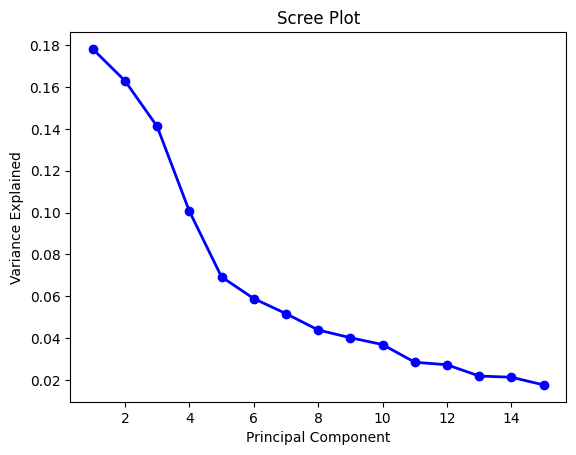

In [260]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [273]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, target, train_size = 0.7, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 15)
(540, 15)
(1257,)
(540,)


In [274]:
my_model.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [275]:
preds = my_model.predict(X_test)

In [276]:
print(accuracy_score(y_test, preds))

0.95
